### Load tensorflow

In [1]:
import tensorflow as tf
#tf.set_random_seed(42)

In [2]:
#tf.set_random_seed(42)

### Collect Data

In [3]:
from google.colab import drive
drive.mount('/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [3]:
import pandas as pd
import numpy as np
import os 

In [4]:
from keras.models import load_model 

Using TensorFlow backend.


In [5]:
#i =0 
directories = []
df = pd.DataFrame(columns=['class','image_file'])
#path = '/gdrive/My Drive/AIML/Covid-19/Chest X-Ray567/'
path = 'Chest X-Ray/'
for root, dirs, files in os.walk(path):
    directories.append(dirs)
    for file in files:
      if file.endswith('.png') or file.endswith('.jpg') or file.endswith('.jpeg'):
        im_class = root.replace(path,'')
        #print(im_class)
        df.loc[df.shape[0]] = [im_class, root+'/'+file]
        #print (root+'/'+file)
        #i = i+1
        #print(i)
      else :
        print(root+'/'+file)
#directories[0]

Chest X-Ray//test.csv
Chest X-Ray//train.csv


### Create Training & Test Dataset

In [6]:
df

,class,image_file
0,Covid-19,Chest X-Ray/Covid-19/01E392EE-69F9-4E33-BFCE-E...
1,Covid-19,Chest X-Ray/Covid-19/03BF7561-A9BA-4C3C-B8A0-D...
2,Covid-19,Chest X-Ray/Covid-19/1-s2.0-S0140673620303706-...
3,Covid-19,Chest X-Ray/Covid-19/1-s2.0-S0929664620300449-...
4,Covid-19,Chest X-Ray/Covid-19/1-s2.0-S0929664620300449-...
...,...,...
2035,Pneumonia,Chest X-Ray/Pneumonia/SARS-10.1148rg.242035193...
2036,Pneumonia,Chest X-Ray/Pneumonia/SARS-10.1148rg.242035193...
2037,Pneumonia,Chest X-Ray/Pneumonia/SARS-10.1148rg.242035193...
2038,Pneumonia,Chest X-Ray/Pneumonia/SARS-10.1148rg.242035193...


In [7]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
train_df.to_csv(path + 'train.csv',index=False)
test_df.to_csv(path + 'test.csv', index=False)

### Read training and test data

In [9]:
#Read training and test Dataframe
train_df = pd.read_csv(path + 'train.csv')
test_df = pd.read_csv(path + 'test.csv')

In [10]:
#Check contents
train_df.sample(n = 5)

,class,image_file
569,Normal,Chest X-Ray/Normal/4da42c54-65cd-4c74-9a75-92a...
1272,Pneumonia,Chest X-Ray/Pneumonia/2993d607-03e5-45ba-9d1e-...
133,Covid-19,Chest X-Ray/Covid-19/379.jpeg
1464,Normal,Chest X-Ray/Normal/33f3c9d7-b9ff-45a2-bb59-c6e...
229,Pneumonia,Chest X-Ray/Pneumonia/177648ba-1d97-4195-bd33-...


In [11]:
#Get class names
class_names = train_df['class'].unique().tolist()
print('target classes: ', class_names)

target classes:  ['Pneumonia', 'Covid-19', 'Normal']


In [12]:
import matplotlib.pyplot as plt
import cv2
#img_num = np.random.randint(0,X_test.shape[0])
x1 = cv2.imread(train_df['image_file'][1000], cv2.IMREAD_GRAYSCALE)
plt.imshow(x1,cmap='gray')
#plt.suptitle(str(y_test[img_num]))
plt.show()

<Figure size 640x480 with 1 Axes>

### Build Batch generator (using ImageDataGenerator)

In [13]:
# Import label encoder 
from sklearn import preprocessing   
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

In [14]:
# Encode labels in 
train_df['class']= label_encoder.fit_transform(train_df['class'])   
train_df['class'].unique() 

array([2, 0, 1], dtype=int64)

In [15]:
train_df['class'].value_counts()

2    590
1    533
0    509
Name: class, dtype: int64

In [16]:
# Encode labels 
test_df['class']= label_encoder.fit_transform(test_df['class'])   
test_df['class'].unique() 

array([2, 1, 0], dtype=int64)

In [17]:
test_df['class'].value_counts()

2    154
0    138
1    116
Name: class, dtype: int64

In [18]:
y_train = np.array(train_df['class'])
y_test = np.array(test_df['class'])

In [19]:
y_train

array([2, 2, 2, ..., 1, 2, 1])

In [20]:
y_test

array([2, 1, 1, 2, 0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 1, 0, 1,
       0, 1, 2, 2, 0, 1, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 0, 0,
       1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2,
       2, 0, 1, 2, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 2, 2, 0, 0,
       1, 0, 1, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0,
       2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1,
       2, 0, 0, 1, 2, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0,
       1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1,
       1, 0, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1,
       2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1, 1, 2, 2, 1, 0, 2, 2, 0, 2,
       1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 1, 1,
       0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2,

In [21]:
category  =  {2 : 'pneumonia' , 1 : 'Covid-19', 0: 'Normal'}

In [22]:
category[1]

'Covid-19'

In [23]:
i = 0
read_images = [] 
for file_name in train_df['image_file'] :
  i = i + 1
  print(i, ' :  ' ,file_name)
#for i in range(0,5) :
  #test_image = image_path  +target_data['filename'][i]
  test_image =  file_name
  #x1 = cv2.imread(test_image, cv2.IMREAD_GRAYSCALE)
  x1 = cv2.imread(test_image)
  x2 = cv2.resize(x1,(224,224)) 
  read_images.append(x2)
  #I.insert(i, np.asarray(Image.open(test_image))) 

1  :   Chest X-Ray/Pneumonia/01a7353d-25bb-4ff8-916b-f50dd541dccf.png
2  :   Chest X-Ray/Pneumonia/314f6860-4382-4ccd-a787-34b388e673f1.png
3  :   Chest X-Ray/Pneumonia/188218bc-84f2-4103-8e34-0dd6d3103b2f.png
4  :   Chest X-Ray/Pneumonia/0e302d0d-b8c2-4d92-a735-12e843ff89df.png
5  :   Chest X-Ray/Pneumonia/156a563f-4580-41d9-b930-2c6859478b50.png
6  :   Chest X-Ray/Pneumonia/18221e7c-d8f0-4d76-b9b0-eee4aff2a191.png
7  :   Chest X-Ray/Covid-19/COVID-19(144).png
8  :   Chest X-Ray/Normal/585f5059-8938-4885-accb-d7d0b1097c60.png
9  :   Chest X-Ray/Normal/b793c936-c845-48c1-aa19-0f6843f2c66f.png
10  :   Chest X-Ray/Pneumonia/0c391e0f-9927-48ce-801f-02eb000f72c3.png
11  :   Chest X-Ray/Normal/bc9dd747-9d7b-429a-9b7c-3c73e246b728.png
12  :   Chest X-Ray/Pneumonia/314b6a0c-897a-4769-8e91-64816d8e5d8a.png
13  :   Chest X-Ray/Covid-19/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg
14  :   Chest X-Ray/Normal/9991aba3-b488-4b14-bf7b-7841d2ddc0c7.png
15  :   Chest X-Ray/Normal/7acd0af3-76d5-4cc3-8fd6-

132  :   Chest X-Ray/Pneumonia/0beac0c9-331a-4aad-9cec-099aff98c399.png
133  :   Chest X-Ray/Covid-19/COVID-19 (125).png
134  :   Chest X-Ray/Covid-19/379.jpeg
135  :   Chest X-Ray/Normal/3a7bffef-ed40-4764-a8ab-2b0ec8820e8b.png
136  :   Chest X-Ray/Covid-19/covid-19-pneumonia-7-L.jpg
137  :   Chest X-Ray/Normal/95e2281a-1cbe-4f53-911a-0c76c84028b4.png
138  :   Chest X-Ray/Covid-19/COVID-19(185).png
139  :   Chest X-Ray/Covid-19/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
140  :   Chest X-Ray/Pneumonia/32c41ed0-6704-465c-94d3-3073b9b4415e.png
141  :   Chest X-Ray/Pneumonia/05083068-f4df-464a-b669-3c084ee05f1f.png
142  :   Chest X-Ray/Normal/a0cc0081-26e2-4e7d-bce0-e07becd1784a.png
143  :   Chest X-Ray/Pneumonia/339728a0-cc96-409e-af99-8af5c6ce5f23.png
144  :   Chest X-Ray/Covid-19/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2a.png
145  :   Chest X-Ray/Normal/1fd2dd8d-8979-433e-901d-9a57e60ea90f.png
146  :   Chest X-Ray/Pneumonia/31790935-a1a3-4842-8

259  :   Chest X-Ray/Pneumonia/159745fa-e4f0-4e8d-8d1d-b64aee7cbb3e.png
260  :   Chest X-Ray/Pneumonia/323d4055-2830-433c-8585-e02ff7821a17.png
261  :   Chest X-Ray/Pneumonia/1563a4ed-d5f5-4e31-8818-c5417109d403.png
262  :   Chest X-Ray/Covid-19/COVID-19 (118).png
263  :   Chest X-Ray/Covid-19/COVID-19(170).png
264  :   Chest X-Ray/Pneumonia/0a9c4c04-5918-48da-9ba1-b2a3add66ae9.png
265  :   Chest X-Ray/Normal/9ede7426-5aa9-4b4a-85a5-ed3ffd486640.png
266  :   Chest X-Ray/Pneumonia/18b5d52d-78e4-490a-a766-af881acda223.png
267  :   Chest X-Ray/Pneumonia/31f4be2a-eb24-4816-8766-56ff59314cc9.png
268  :   Chest X-Ray/Pneumonia/1693a790-88c8-46fa-9ce7-3b0c5834ba90.png
269  :   Chest X-Ray/Pneumonia/07b7b9b0-718a-4750-b1f4-5af45c5607f2.png
270  :   Chest X-Ray/Normal/7ba1a92f-88dc-47ad-9067-966b88125c52.png
271  :   Chest X-Ray/Covid-19/20.png
272  :   Chest X-Ray/Normal/c25dbebd-1d11-45cb-a165-fabc0ca3c0fa.png
273  :   Chest X-Ray/Normal/46e03a36-7c4a-4c20-a0b9-612e1469998d.png
274  :   Chest

388  :   Chest X-Ray/Pneumonia/32764f2f-ea89-4d7c-aa7d-e70366218270.png
389  :   Chest X-Ray/Covid-19/40.jpg
390  :   Chest X-Ray/Normal/64be85d9-4e40-46d4-bd62-802f2304db21.png
391  :   Chest X-Ray/Normal/9173958b-6d82-4a00-8acc-60f1d27ca667.png
392  :   Chest X-Ray/Pneumonia/0b1d5b23-c3ab-41b5-b82d-a16a3d6b5674.png
393  :   Chest X-Ray/Covid-19/93FE0BB1-022D-4F24-9727-987A07975FFB.jpeg
394  :   Chest X-Ray/Covid-19/COVID-19 (69).png
395  :   Chest X-Ray/Pneumonia/3333d928-dd10-46f2-927e-f7d5ac070221.png
396  :   Chest X-Ray/Normal/be8ac7bd-1d5f-491c-86c8-e7cd2386c9e2.png
397  :   Chest X-Ray/Covid-19/90.jpeg
398  :   Chest X-Ray/Covid-19/COVID-19 (64).png
399  :   Chest X-Ray/Normal/0803b0fa-c026-40d3-b9b6-43b843d17632.png
400  :   Chest X-Ray/Covid-19/COVID-19 (124).png
401  :   Chest X-Ray/Covid-19/COVID-19(234).png
402  :   Chest X-Ray/Pneumonia/18832ae7-6e31-4667-8eb5-3eddf5ab6d8e.png
403  :   Chest X-Ray/Covid-19/343.jpeg
404  :   Chest X-Ray/Pneumonia/22c1b139-cb5e-41cd-83fd-7e

521  :   Chest X-Ray/Pneumonia/27205fb6-5f28-4fc5-a9d8-c6748b97f4f7.png
522  :   Chest X-Ray/Normal/47d188c2-6a54-4548-975e-85a63643b08b.png
523  :   Chest X-Ray/Normal/9019b731-8b95-4ff3-8542-6e8a9e0b6cde.png
524  :   Chest X-Ray/Covid-19/nejmc2001573_f1a.jpeg
525  :   Chest X-Ray/Covid-19/80.jpeg
526  :   Chest X-Ray/Pneumonia/08da8f40-b186-473b-9fa3-1caa4ecdc02b.png
527  :   Chest X-Ray/Normal/71d25920-4060-4a31-b7aa-cfbf4721a5c5.png
528  :   Chest X-Ray/Pneumonia/3352dd2e-717c-4a5a-ad4b-81315818b351.png
529  :   Chest X-Ray/Covid-19/148.jpg
530  :   Chest X-Ray/Covid-19/114.jpg
531  :   Chest X-Ray/Pneumonia/3038262f-ca56-436a-bdfe-7a547026fcb0.png
532  :   Chest X-Ray/Pneumonia/33f85237-bcad-4dd9-8a03-42d061fd987f.png
533  :   Chest X-Ray/Covid-19/2C26F453-AF3B-4517-BB9E-802CF2179543.jpeg
534  :   Chest X-Ray/Pneumonia/3247efbe-0804-4aa6-865b-155e6b9bbb86.png
535  :   Chest X-Ray/Covid-19/COVID-19 (42).png
536  :   Chest X-Ray/Pneumonia/32659f33-5e60-4db1-9696-657e54b769c8.png
537

649  :   Chest X-Ray/Normal/179f022d-f515-438c-b17d-f0a998b0e115.png
650  :   Chest X-Ray/Pneumonia/19370915-6723-41fe-be09-29defbd9b7c1.png
651  :   Chest X-Ray/Covid-19/COVID-19 (58).png
652  :   Chest X-Ray/Covid-19/F051E018-DAD1-4506-AD43-BE4CA29E960B.jpeg
653  :   Chest X-Ray/Pneumonia/34aca5a7-7786-4060-afea-cf31d8fc05d6.png
654  :   Chest X-Ray/Covid-19/pneumonia-7.jpg
655  :   Chest X-Ray/Pneumonia/159eced6-02dd-4c88-ba1e-e34c4c9a00b5.png
656  :   Chest X-Ray/Pneumonia/06327569-4e4f-4fdc-a116-db367c079669.png
657  :   Chest X-Ray/Covid-19/383.jpeg
658  :   Chest X-Ray/Normal/b540ba89-72f7-40f5-a916-376546c20014.png
659  :   Chest X-Ray/Pneumonia/0637b804-e693-48d1-8716-f7c63ce6162a.png
660  :   Chest X-Ray/Normal/b1dda51c-9c0e-4695-bd29-e7173f05182d.png
661  :   Chest X-Ray/Covid-19/129.png
662  :   Chest X-Ray/Covid-19/101.jpeg
663  :   Chest X-Ray/Covid-19/310.jpeg
664  :   Chest X-Ray/Covid-19/COVID-19(203).png
665  :   Chest X-Ray/Normal/4b92f925-74f7-4941-94d7-0883aebab46a

787  :   Chest X-Ray/Covid-19/153.jpeg
788  :   Chest X-Ray/Covid-19/11.png
789  :   Chest X-Ray/Pneumonia/0a9fd225-a33a-47de-849e-156933b21296.png
790  :   Chest X-Ray/Pneumonia/18792f05-1f16-4343-884c-c33420e6b104.png
791  :   Chest X-Ray/Covid-19/COVID-19 (80).png
792  :   Chest X-Ray/Normal/32b54814-6d30-4cbf-9d41-e6c98f3fe375.png
793  :   Chest X-Ray/Normal/c57ad4fd-3aa8-4ae8-a262-7336360d8265.png
794  :   Chest X-Ray/Pneumonia/0cc66f3f-6bfb-4f99-bbc6-ed28bf3f740c.png
795  :   Chest X-Ray/Covid-19/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg
796  :   Chest X-Ray/Pneumonia/077780cb-eb05-478f-a7d7-f0576e4c34df.png
797  :   Chest X-Ray/Normal/956c2cb5-3a6a-4341-9535-ff0358ce7320.png
798  :   Chest X-Ray/Normal/9740909f-3d1f-40d7-861c-2d894c24eaa7.png
799  :   Chest X-Ray/Normal/b9e5b5ab-0f77-418d-bd5b-ecce5da142e8.png
800  :   Chest X-Ray/Covid-19/142.jpeg
801  :   Chest X-Ray/Pneumonia/01fa0f5e-00c3-41cb-b5c7-10600c8633ae.png
802  :   Chest X-Ray/Normal/0bc32046-7369-4a87-b9d0-58252635

914  :   Chest X-Ray/Normal/9315194a-b5b6-48e3-86df-72e2d093d45b.png
915  :   Chest X-Ray/Normal/9fa9dd9a-d129-43b0-8029-1e09798402b4.png
916  :   Chest X-Ray/Pneumonia/33c66fa9-6a08-4d0d-b309-88ce91a217c9.png
917  :   Chest X-Ray/Pneumonia/34985379-397f-4afb-9ca7-538cc629703b.png
918  :   Chest X-Ray/Covid-19/COVID-19(164).png
919  :   Chest X-Ray/Covid-19/CD50BA96-6982-4C80-AE7B-5F67ACDBFA56.jpeg
920  :   Chest X-Ray/Normal/aa2da4e8-67d5-4ad1-bd7f-7b013ecda555.png
921  :   Chest X-Ray/Covid-19/105.jpeg
922  :   Chest X-Ray/Normal/b1079255-fb2b-4639-a140-70bca2fa2253.png
923  :   Chest X-Ray/Pneumonia/061b44ff-fd22-473d-853f-81da70e14a63.png
924  :   Chest X-Ray/Pneumonia/31764d54-ea3b-434f-bae2-8c579ed13799.png
925  :   Chest X-Ray/Normal/6af28755-0522-4b37-97d8-b931a31b876c.png
926  :   Chest X-Ray/Covid-19/332.jpeg
927  :   Chest X-Ray/Pneumonia/08b1c32d-e070-4a2c-9d75-f41055b7273b.png
928  :   Chest X-Ray/Normal/ac6c0c0b-61bc-4bc1-b624-be8232028554.png
929  :   Chest X-Ray/Normal/

1042  :   Chest X-Ray/Normal/41412fca-e51e-4829-bef6-716f727d61f9.png
1043  :   Chest X-Ray/Pneumonia/23aa3daa-1283-4144-9299-6e4ffab7a8f4.png
1044  :   Chest X-Ray/Normal/3f78f146-2666-454a-a91b-793dc0943de0.png
1045  :   Chest X-Ray/Normal/b7bda9f8-36fa-49a1-83e2-52889114a465.png
1046  :   Chest X-Ray/Normal/ad446933-fb8e-4739-bb40-2063e796ffd8.png
1047  :   Chest X-Ray/Pneumonia/0b202292-a925-4706-963f-28fd16cef0c2.png
1048  :   Chest X-Ray/Pneumonia/parapneumonic-effusion-1-PA.png
1049  :   Chest X-Ray/Covid-19/COVID-19(188).png
1050  :   Chest X-Ray/Covid-19/10.png
1051  :   Chest X-Ray/Covid-19/COVID-19 (111).png
1052  :   Chest X-Ray/Normal/c335fede-a2b6-4c5a-8700-2b24dd479bd8.png
1053  :   Chest X-Ray/Pneumonia/01dc817c-3cfa-49fe-8662-518edc30652a.png
1054  :   Chest X-Ray/Pneumonia/18f349ea-e436-443c-a040-c07c705f9989.png
1055  :   Chest X-Ray/Covid-19/ciaa199.pdf-001-b.png
1056  :   Chest X-Ray/Covid-19/COVID-19 (65).png
1057  :   Chest X-Ray/Covid-19/COVID-19(138).png
1058  

1170  :   Chest X-Ray/Normal/9b4dfad1-4131-4e3f-bafb-4ea856b414f5.png
1171  :   Chest X-Ray/Normal/4566ef68-f103-40b7-bbd2-f5e620191c0d.png
1172  :   Chest X-Ray/Pneumonia/231de9e8-63d9-4093-9d57-2bdcdee49225.png
1173  :   Chest X-Ray/Covid-19/COVID-19(154).png
1174  :   Chest X-Ray/Covid-19/31BA3780-2323-493F-8AED-62081B9C383B.jpeg
1175  :   Chest X-Ray/Normal/711fa1db-25af-44b9-b91a-834e095bed95.png
1176  :   Chest X-Ray/Normal/56b0cf24-93a5-480f-b295-ec9c6e0ceb3b.png
1177  :   Chest X-Ray/Pneumonia/01d4fa0f-97a0-4522-b0d8-134400db2a3e.png
1178  :   Chest X-Ray/Covid-19/radiopedia-covid-19-pneumonia-2.jpg
1179  :   Chest X-Ray/Normal/15e58227-dc56-4040-9c5a-c574cbcbe559.png
1180  :   Chest X-Ray/Pneumonia/12e6144b-edc2-4d4e-9ae8-ca95d9aad065.png
1181  :   Chest X-Ray/Covid-19/COVID-19(237).png
1182  :   Chest X-Ray/Pneumonia/3374e3a8-2156-4553-b434-805405e67264.png
1183  :   Chest X-Ray/Covid-19/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3a.png
1184  :   Chest X-Ray/Covid-

1295  :   Chest X-Ray/Pneumonia/13acd418-a94d-4b36-900d-c13b9bd048c9.png
1296  :   Chest X-Ray/Pneumonia/32dbe7f3-6c0d-4320-9c89-775dbbb933e8.png
1297  :   Chest X-Ray/Covid-19/radiol.2020200490.fig3.jpeg
1298  :   Chest X-Ray/Covid-19/COVID-19 (101).png
1299  :   Chest X-Ray/Pneumonia/1acc13bc-a199-49bf-8360-c20314fd85fd.png
1300  :   Chest X-Ray/Covid-19/54.jpg
1301  :   Chest X-Ray/Pneumonia/162b17de-b15d-4122-9352-ec3445f61f35.png
1302  :   Chest X-Ray/Pneumonia/02e93c9a-c063-4bf2-9fa1-cb26692d58f8.png
1303  :   Chest X-Ray/Pneumonia/08f17660-dc61-4a5d-b6fb-10dacc1e20a2.png
1304  :   Chest X-Ray/Covid-19/316.jpeg
1305  :   Chest X-Ray/Covid-19/COVID-19(137).png
1306  :   Chest X-Ray/Covid-19/SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day19.jpeg
1307  :   Chest X-Ray/Pneumonia/cavitating-pneumonia-4-day28-PA.png
1308  :   Chest X-Ray/Pneumonia/32c39ff5-359a-4a7b-b41d-d7ad312766a3.png
1309  :   Chest X-Ray/Covid-19/COVID-19(218).png
1310  :   Chest X-Ray/Pneumonia/2bbcfa00-cfcb-4761-

1420  :   Chest X-Ray/Normal/14cc02cb-fc0b-4fbf-bde1-76eab9a48493.png
1421  :   Chest X-Ray/Covid-19/covid-19-pneumonia-19.jpg
1422  :   Chest X-Ray/Pneumonia/2c8258f4-ecf5-4dba-b17a-5411cc1d569e.png
1423  :   Chest X-Ray/Normal/975f414b-16ec-44bd-9e61-97faa1433a15.png
1424  :   Chest X-Ray/Normal/bd0b7f64-8ae8-48c7-8753-aa128fd773ec.png
1425  :   Chest X-Ray/Pneumonia/192f8bc4-1d12-4b3e-84a6-d94f77928faf.png
1426  :   Chest X-Ray/Normal/a8e3ea7d-0b63-45cf-85d8-1078d3e2449d.png
1427  :   Chest X-Ray/Covid-19/COVID-19(191).png
1428  :   Chest X-Ray/Normal/89dd8f63-8320-48f3-b142-d903f40d5c8c.png
1429  :   Chest X-Ray/Covid-19/COVID-19(207).png
1430  :   Chest X-Ray/Normal/ac39f865-a23c-4f83-b174-da88497fb3f8.png
1431  :   Chest X-Ray/Pneumonia/17bb233f-6ee9-4645-92ee-b415499f691a.png
1432  :   Chest X-Ray/Normal/3bb7e241-81e4-4257-8c45-1a51d6b798f2.png
1433  :   Chest X-Ray/Pneumonia/32176b3f-d931-4219-a5f8-e2af7eff02b3.png
1434  :   Chest X-Ray/Pneumonia/08ab87a3-886f-4b5a-9818-889337c

1548  :   Chest X-Ray/Normal/960131aa-4ce4-4b26-aa12-5f73d8d81453.png
1549  :   Chest X-Ray/Covid-19/363.jpeg
1550  :   Chest X-Ray/Covid-19/110.jpeg
1551  :   Chest X-Ray/Normal/436e1ed4-19da-4d91-bae2-b06eec8c1a6a.png
1552  :   Chest X-Ray/Covid-19/COVID-19(175).png
1553  :   Chest X-Ray/Pneumonia/0927e819-9640-487d-a04e-f5d4732dbe0a.png
1554  :   Chest X-Ray/Pneumonia/09eed5c5-e0e9-463c-b6f7-24e2de881287.png
1555  :   Chest X-Ray/Pneumonia/34d36b9f-af87-4891-b001-6dc4f5379cb2.png
1556  :   Chest X-Ray/Pneumonia/07075b45-c83b-4e9a-971e-4b6c4554a0ef.png
1557  :   Chest X-Ray/Covid-19/150.png
1558  :   Chest X-Ray/Pneumonia/06697be9-b1ab-444c-af0d-fd11a053f2b3.png
1559  :   Chest X-Ray/Normal/5f9692fa-23cd-4ed0-a9db-5571482f6d11.png
1560  :   Chest X-Ray/Covid-19/COVID-19(232).png
1561  :   Chest X-Ray/Pneumonia/0697baae-e475-4fa3-ad82-51b319a026cc.png
1562  :   Chest X-Ray/Normal/43e9313d-47be-4c69-8b6f-655d6404d7f0.png
1563  :   Chest X-Ray/Covid-19/39EE8E69-5801-48DE-B6E3-BE7D1BCF30

In [24]:
import matplotlib.pyplot as plt

In [25]:
X_train = np.asarray(read_images)

In [26]:
X_train.shape

(1632, 224, 224, 3)

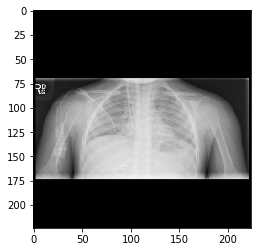

In [27]:
plt.imshow(X_train[1],cmap = 'gray' )
plt.show()

In [28]:
i = 0
read_images = [] 
for file_name in test_df['image_file'] :
  i = i + 1
  print(i, ' :  ' ,file_name)
#for i in range(0,5) :
  #test_image = image_path  +target_data['filename'][i]
  test_image =  file_name
  #x1 = cv2.imread(test_image, cv2.IMREAD_GRAYSCALE)
  x1 = cv2.imread(test_image)
  x2 = cv2.resize(x1,(224,224)) 
  read_images.append(x2)
  #I.insert(i, np.asarray(Image.open(test_image))) 

1  :   Chest X-Ray/Pneumonia/020380f8-5c5a-4ded-bdf3-9ce3036945b4.png
2  :   Chest X-Ray/Normal/79ffd214-6464-406a-a78b-5aaa8cc1fe7e.png
3  :   Chest X-Ray/Normal/8c80ee20-1e1e-400f-b727-9cfd07213c13.png
4  :   Chest X-Ray/Pneumonia/33da8f93-c3f9-413c-bc49-2a51f34aded2.png
5  :   Chest X-Ray/Covid-19/COVID-19(196).png
6  :   Chest X-Ray/Pneumonia/34aba493-c3b3-49db-a2fa-b65345248969.png
7  :   Chest X-Ray/Covid-19/COVID-19 (47).png
8  :   Chest X-Ray/Normal/766b5e20-bd37-4b28-b643-c9d0ca0e7a63.png
9  :   Chest X-Ray/Covid-19/COVID-19 (49).png
10  :   Chest X-Ray/Pneumonia/09b2d54e-3a85-4efd-8204-ea73bc70c405.png
11  :   Chest X-Ray/Pneumonia/0c0dbae5-b0a7-43b7-a964-11e6bcf40ae9.png
12  :   Chest X-Ray/Pneumonia/0f831256-0a69-4fe5-9719-1563d2b6b7b9.png
13  :   Chest X-Ray/Covid-19/45.jpeg
14  :   Chest X-Ray/Pneumonia/15cc8c22-055e-4e64-8c5f-38816f82daa0.png
15  :   Chest X-Ray/Covid-19/1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg
16  :   Chest X-Ray/Normal/96828632-6f46-41d3-801e-faf8616a

133  :   Chest X-Ray/Pneumonia/0851431b-cad7-436f-acb8-06aed97e5339.png
134  :   Chest X-Ray/Normal/0b8e3d9e-0bcd-41a3-b788-0175c43b2624.png
135  :   Chest X-Ray/Pneumonia/2aae181e-a4b7-47f4-ac47-e99001b9008b.png
136  :   Chest X-Ray/Pneumonia/0b8f8765-0406-447c-b873-7ac5ce8884aa.png
137  :   Chest X-Ray/Covid-19/F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg
138  :   Chest X-Ray/Normal/ac494c18-5513-4b25-9f80-31ce94ecf4e6.png
139  :   Chest X-Ray/Pneumonia/0c15e437-7eea-4ed1-b1d8-124f79cc1893.png
140  :   Chest X-Ray/Covid-19/COVID-19 (95).png
141  :   Chest X-Ray/Pneumonia/17a5ce04-809a-42ed-9e58-100cfb33de7a.png
142  :   Chest X-Ray/Pneumonia/29576186-ed47-4331-8ea0-08d899822c1f.png
143  :   Chest X-Ray/Normal/88415ac3-d964-4a56-b329-8b4b3f2d5eba.png
144  :   Chest X-Ray/Pneumonia/340244af-50e9-405f-85af-7fe6c8e0f838.png
145  :   Chest X-Ray/Covid-19/COVID-19(150).png
146  :   Chest X-Ray/Normal/6341cfa4-97f6-4c58-ba26-ed7e0972f0e7.png
147  :   Chest X-Ray/Pneumonia/3502cf28-bcc2-4cf4-84

266  :   Chest X-Ray/Normal/3a5327d8-8830-4ae2-bd6b-293f5aa42d4b.png
267  :   Chest X-Ray/Normal/4d3c3af5-d797-41b1-b05a-23468edd050a.png
268  :   Chest X-Ray/Pneumonia/05b91b32-5635-4071-b45d-6a73f8eea918.png
269  :   Chest X-Ray/Pneumonia/3162d754-7972-47b0-ae60-1ae6e2bb4150.png
270  :   Chest X-Ray/Covid-19/acute-respiratory-distress-syndrome-ards-1.jpg
271  :   Chest X-Ray/Pneumonia/2e04a49d-3aac-4245-be51-8e96ce679a0c.png
272  :   Chest X-Ray/Normal/01f11e57-5c11-4ab0-9312-d88c3826721c.png
273  :   Chest X-Ray/Normal/b6aa50f1-f06f-4770-8223-1f357d0ec5a4.png
274  :   Chest X-Ray/Covid-19/102.jpeg
275  :   Chest X-Ray/Pneumonia/08c343b6-9dc4-405b-87b3-b6534abcb990.png
276  :   Chest X-Ray/Covid-19/139.jpeg
277  :   Chest X-Ray/Pneumonia/18c4af3d-0768-4f17-9c1f-d6f8199098ac.png
278  :   Chest X-Ray/Covid-19/109.jpeg
279  :   Chest X-Ray/Pneumonia/0100515c-5204-4f31-98e0-f35e4b00004a.png
280  :   Chest X-Ray/Covid-19/COVID-19 (15).png
281  :   Chest X-Ray/Pneumonia/0daa445f-6b0b-499f-

400  :   Chest X-Ray/Normal/0ad17cb4-c693-4ac1-9bfb-8e7660c265a2.png
401  :   Chest X-Ray/Pneumonia/1d1badbd-7789-4923-a387-7ee4e3b18cc7.png
402  :   Chest X-Ray/Covid-19/COVID-19(143).png
403  :   Chest X-Ray/Pneumonia/20ed5a77-bb84-4c95-b126-714bd59cdfbf.png
404  :   Chest X-Ray/Pneumonia/0f0a1877-3f44-42f0-8905-2856078ff2ac.png
405  :   Chest X-Ray/Covid-19/COVID-19(136).png
406  :   Chest X-Ray/Pneumonia/17700745-d6cb-49cb-aa70-d725ba0165ae.png
407  :   Chest X-Ray/Normal/3360d5d9-e1b5-448f-87a4-df15eed8a095.png
408  :   Chest X-Ray/Pneumonia/00aecb01-a116-45a2-956c-08d2fa55433f.png


In [29]:
X_test = np.asarray(read_images)

In [30]:
X_test.shape

(408, 224, 224, 3)

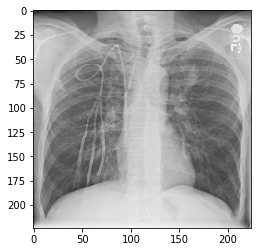

In [31]:
plt.imshow(X_test[1],cmap = 'gray' )
plt.show()

In [34]:
X_test.astype(dtype=float)
X_train.astype(dtype=float)

array([[[[  5.,   5.,   5.],
         [  5.,   5.,   5.],
         [  5.,   5.,   5.],
         ...,
         [  5.,   5.,   5.],
         [  5.,   5.,   5.],
         [  6.,   6.,   6.]],

        [[  4.,   4.,   4.],
         [  4.,   4.,   4.],
         [  3.,   3.,   3.],
         ...,
         [  4.,   4.,   4.],
         [  4.,   4.,   4.],
         [  4.,   4.,   4.]],

        [[  4.,   4.,   4.],
         [  4.,   4.,   4.],
         [  4.,   4.,   4.],
         ...,
         [  4.,   4.,   4.],
         [  4.,   4.,   4.],
         [  4.,   4.,   4.]],

        ...,

        [[ 13.,  13.,  13.],
         [ 11.,  11.,  11.],
         [ 27.,  27.,  27.],
         ...,
         [109., 109., 109.],
         [ 72.,  72.,  72.],
         [130., 130., 130.]],

        [[ 12.,  12.,  12.],
         [ 16.,  16.,  16.],
         [ 30.,  30.,  30.],
         ...,
         [ 94.,  94.,  94.],
         [ 67.,  67.,  67.],
         [127., 127., 127.]],

        [[ 11.,  11.,  11.],
       

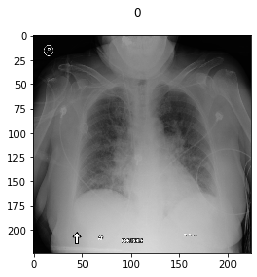

In [35]:
#Lets print the image as well
#import matplotlib.pyplot as plt
img_num = np.random.randint(0,X_test.shape[0])
plt.imshow(X_test[0],cmap='gray')
plt.suptitle(str(y_test[img_num]))
plt.show()

### Convert Output label to multiple values

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)
#y_val = tf.keras.utils.to_categorical(y_val, num_classes=3)

In [54]:
y_train[0]

array([1., 0., 0.], dtype=float32)

## Build the Graph

In [0]:
img_depth =3

In [0]:
#keras.applications.resnet.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)


In [0]:
import tensorflow as tf
#tf.set_random_seed(42)

In [0]:
tf.keras.backend.clear_session()
model = tf.keras.applications.vgg16.VGG16(include_top=False, #Do not include classification layer for imagenet
                                       input_shape=(224,224, img_depth),
                                       weights='imagenet')

In [57]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [58]:
model.output

<tf.Tensor 'block5_pool/Identity:0' shape=(None, 7, 7, 512) dtype=float32>

###Freeze the layers in Pre-trained model

In [59]:
len(model.layers)

19

In [0]:
#Set pre-trained model layers to not trainable
for layer in model.layers:
    layer.trainable = False

In [61]:
#Check if layers frozen
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Add FC layer for new classes

In [0]:
#get Output layer of Pre0trained model
x = model.output

#Global average pool to reduce number of features and Flatten the output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [63]:
#Output shape of Global Average Pooling
x

<tf.Tensor 'global_average_pooling2d/Identity:0' shape=(None, 512) dtype=float32>

In [0]:
#Add output layer
prediction = tf.keras.layers.Dense(3,activation='softmax')(x)

### Building final model for Classification

In [0]:
#Using Keras Model class
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added

In [0]:
#Compile the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
#How does our overall model looks
final_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Add layers for Classification

## Train the model

In [0]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('covid_net.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose=1)

In [0]:
#Lets train for 10 more steps
hist_model = final_model.fit(X_train, y_train, 
                          epochs=10,
                          initial_epoch=0,
                          steps_per_epoch= 1632//64,
                          validation_data=(X_test,y_test),  
                          validation_steps = 408//64, 
                          callbacks=[model_checkpoint])

Epoch 1/10
25/25 [==============================] - 1092s 44s/step - loss: 3.4025 - accuracy: 0.3100 - val_loss: 2.1372 - val_accuracy: 0.3621
Epoch 2/10
25/25 [==============================] - 1087s 43s/step - loss: 1.6650 - accuracy: 0.4889 - val_loss: 1.1422 - val_accuracy: 0.5776
Epoch 3/10
25/25 [==============================] - 1091s 44s/step - loss: 1.0381 - accuracy: 0.6491 - val_loss: 0.8315 - val_accuracy: 0.6875
Epoch 4/10
11/25 [============>.................] - ETA: 7:47 - loss: 0.8385 - accuracy: 0.6970

In [0]:
#Lets train for 10 more steps
hist_model = final_model.fit(X_train, y_train, 
                          epochs=20,
                          initial_epoch=10,
                          steps_per_epoch= 1632//64,
                          validation_data=(X_test,y_test),  
                          validation_steps = 408//64, 
                          callbacks=[model_checkpoint])

Epoch 11/20
25/25 [==============================] - 287s 11s/step - loss: 0.2564 - accuracy: 0.9191 - val_loss: 0.3808 - val_accuracy: 0.8603
Epoch 12/20
25/25 [==============================] - 287s 11s/step - loss: 0.2396 - accuracy: 0.9259 - val_loss: 0.3572 - val_accuracy: 0.8676
Epoch 13/20
25/25 [==============================] - 287s 11s/step - loss: 0.2341 - accuracy: 0.9252 - val_loss: 0.3690 - val_accuracy: 0.8652
Epoch 14/20
25/25 [==============================] - 287s 11s/step - loss: 0.2236 - accuracy: 0.9283 - val_loss: 0.3532 - val_accuracy: 0.8701
Epoch 15/20
25/25 [==============================] - 287s 11s/step - loss: 0.2157 - accuracy: 0.9301 - val_loss: 0.3513 - val_accuracy: 0.8824
Epoch 16/20
25/25 [==============================] - 287s 11s/step - loss: 0.2065 - accuracy: 0.9326 - val_loss: 0.3511 - val_accuracy: 0.8676
Epoch 17/20
25/25 [==============================] - 288s 12s/step - loss: 0.2001 - accuracy: 0.9381 - val_loss: 0.3556 - val_accuracy: 0.8775

### Execute Graph

In [0]:
print(hist_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [0]:
hist_model.history['loss']

[0.25635969638824463,
 0.23962992429733276,
 0.23414699733257294,
 0.22359806299209595,
 0.21574801206588745,
 0.20654205977916718,
 0.20010843873023987,
 0.1974439024925232,
 0.186106875538826,
 0.1766691952943802]

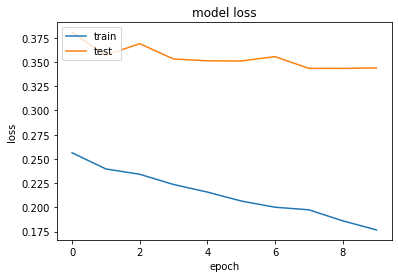

In [0]:
# summarize history for loss
plt.plot(hist_model.history['loss'])
plt.plot(hist_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

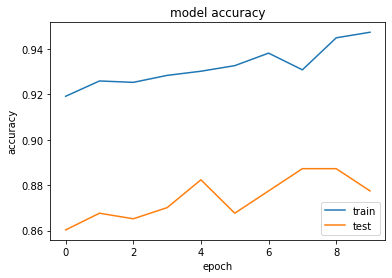

In [0]:
# summarize history for accuracy
plt.plot(hist_model.history['accuracy'])
plt.plot(hist_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [0]:
scores = final_model.evaluate(X_test, y_test, verbose=0)
scores

[0.3424694836139679, 0.8774510025978088]

In [0]:
import sklearn.metrics as metrics

In [0]:
y_pred_ohe = final_model.predict(X_test)  # shape=(n_samples, 12)
y_pred_labels = np.argmax(y_pred_ohe, axis=1) 

In [0]:
y_true_labels = np.argmax(y_test, axis=1)

In [0]:
confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels) 

In [0]:
confusion_matrix

array([[124,   4,   3],
       [  5, 105,  11],
       [ 11,  16, 129]])

In [0]:
category  =  {2 : 'pneumonia' , 1 : 'Covid-19', 0: 'Normal'}
#['Normal', 'Covid-19', 'Pneumonia']

A P 
1 1


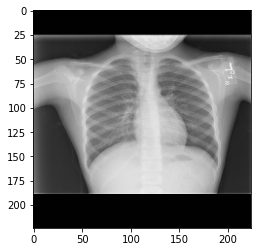

A P 
1 1


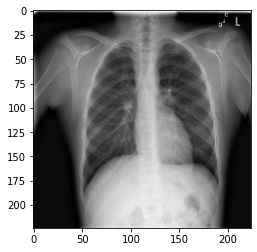

In [0]:
for i in range(2):
  print('A P ')
  #print(np.argmax(y_test[i]),np.argmax(predictions[i]),category[np.argmax(predictions[i])])
  print(y_true_labels[i], y_pred_labels[i])
  plt.imshow(X_test[i],cmap='gray')
  plt.show()

### Unfreeze some of Trained Layers in ResNet

In [0]:
print(len(model.layers))

175


Let's unfreeze 10% at the end (which have high end features more specific to ImageNet)

In [0]:
#Unfreezing all layers after layer# 150
for layer in model.layers[170:]:
    layer.trainable = True    

In [0]:
#We will need to recompile the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [0]:
#Lets train for 10 more steps
hist_model = final_model.fit(X_train, y_train, 
                          epochs=30,
                          initial_epoch=20,
                          steps_per_epoch= 1632//64,
                          validation_data=(X_test,y_test),  
                          validation_steps = 408//64, 
                          callbacks=[model_checkpoint])

Epoch 21/30
25/25 [==============================] - 380s 15s/step - loss: 0.7289 - accuracy: 0.8192 - val_loss: 1020.3040 - val_accuracy: 0.2966
Epoch 22/30
25/25 [==============================] - 379s 15s/step - loss: 0.1795 - accuracy: 0.9436 - val_loss: 161.1022 - val_accuracy: 0.3088
Epoch 23/30
25/25 [==============================] - 380s 15s/step - loss: 0.0817 - accuracy: 0.9749 - val_loss: 82.1221 - val_accuracy: 0.3701
Epoch 24/30
25/25 [==============================] - 378s 15s/step - loss: 0.0431 - accuracy: 0.9877 - val_loss: 7.5569 - val_accuracy: 0.7402
Epoch 25/30
25/25 [==============================] - 378s 15s/step - loss: 0.0280 - accuracy: 0.9902 - val_loss: 1.0509 - val_accuracy: 0.8358
Epoch 26/30
25/25 [==============================] - 379s 15s/step - loss: 0.0279 - accuracy: 0.9908 - val_loss: 0.6974 - val_accuracy: 0.8725
Epoch 27/30
25/25 [==============================] - 378s 15s/step - loss: 0.0255 - accuracy: 0.9914 - val_loss: 0.4850 - val_accuracy: 

In [0]:
print(hist_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [0]:
hist_model.history['loss']

[0.7289069294929504,
 0.17952342331409454,
 0.08165944367647171,
 0.043084338307380676,
 0.02800603210926056,
 0.027943080291152,
 0.02550208568572998,
 0.016833307221531868,
 0.019746046513319016,
 0.014255448244512081]

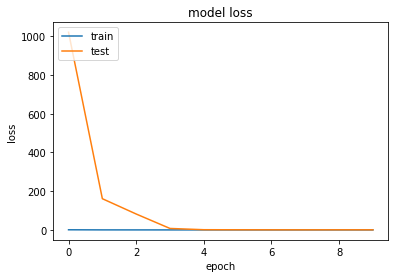

In [0]:
# summarize history for loss
plt.plot(hist_model.history['loss'])
plt.plot(hist_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

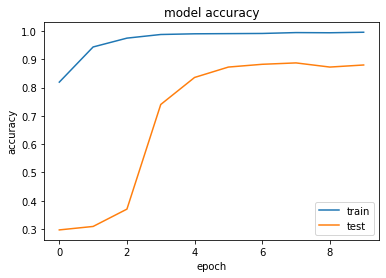

In [0]:
# summarize history for accuracy
plt.plot(hist_model.history['accuracy'])
plt.plot(hist_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [0]:
scores = final_model.evaluate(X_test, y_test, verbose=1)
scores

13/13 [==============================] - 55s 4s/step - loss: 0.4820 - accuracy: 0.8799


[0.48200953006744385, 0.8799019455909729]

In [0]:
y_pred_ohe = final_model.predict(X_test)  # shape=(n_samples, 12)
y_pred_labels = np.argmax(y_pred_ohe, axis=1) 

In [0]:
y_true_labels = np.argmax(y_test, axis=1)

In [0]:
confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels) 

In [0]:
confusion_matrix

array([[125,   1,   5],
       [  2,  99,  20],
       [  7,  14, 135]])

A P 
1 1


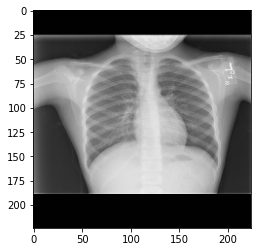

A P 
1 1


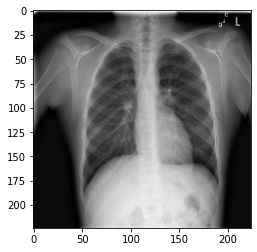

A P 
1 1


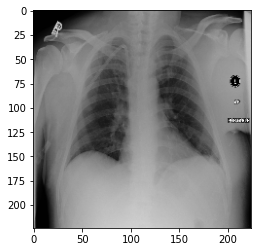

A P 
0 0


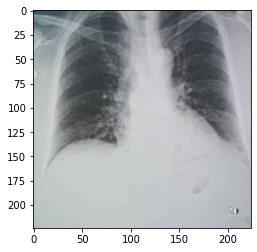

A P 
2 2


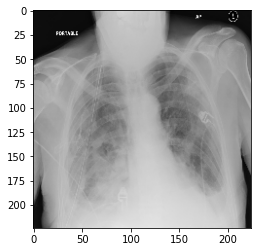

A P 
0 0


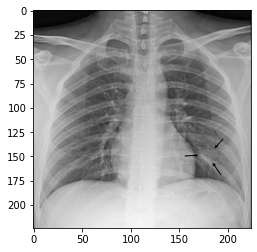

A P 
2 1


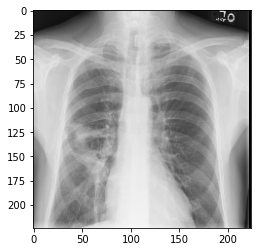

A P 
1 1


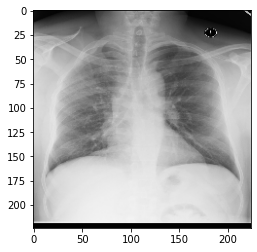

A P 
2 2


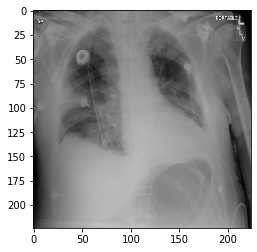

A P 
0 0


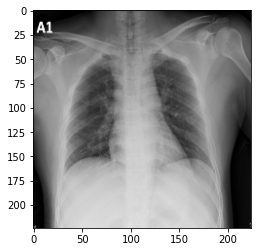

A P 
0 0


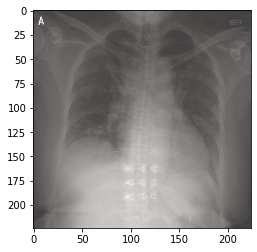

A P 
0 0


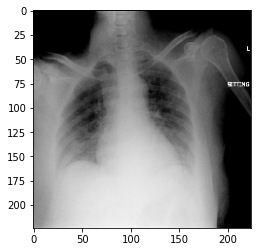

A P 
2 2


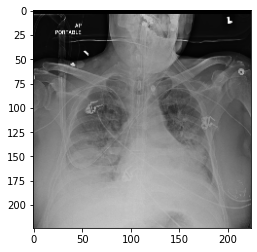

A P 
0 0


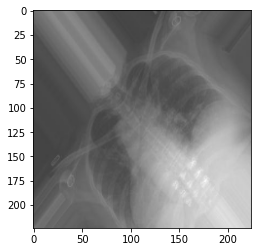

A P 
2 2


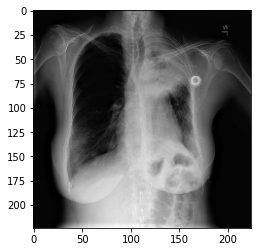

A P 
1 1


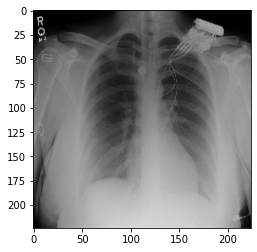

A P 
1 2


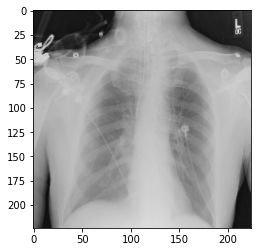

A P 
2 2


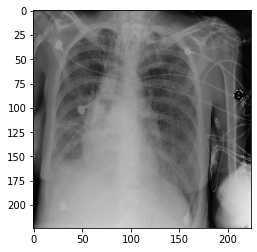

A P 
1 1


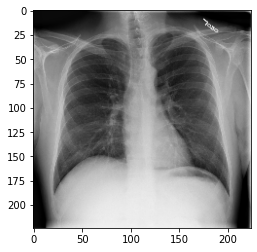

A P 
1 1


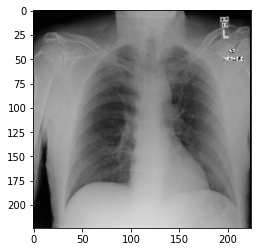

In [0]:
for i in range(20):
  print('A P ')
  #print(np.argmax(y_test[i]),np.argmax(predictions[i]),category[np.argmax(predictions[i])])
  print(y_true_labels[i], y_pred_labels[i])
  plt.imshow(X_test[i],cmap='gray')
  plt.show()